<a href="https://colab.research.google.com/github/Jaeljane/EDA/blob/main/Bivariate_Explonatory_of_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df=pd.read_csv('/content/fuel-econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [4]:
df.shape

(3929, 20)

##Scatterplots
If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

##Relationship between Engine displacement and fuel milage(comb)

Text(0, 0.5, 'Combined fuel efficiency (mpg)')

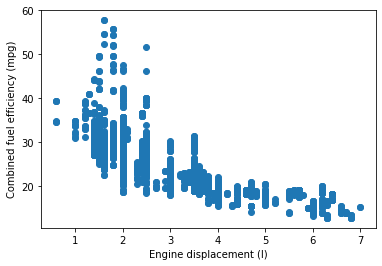

In [6]:
plt.scatter(data=df, x='displ', y='comb')
plt.xlabel('Engine displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)')

The graph suggests that there is a negative correlation between Engine displacement and combined fuel milage, ie the bigger the engine displacement the lower the combined fuel efficiency

##Ploting using seaborn

Text(0, 0.5, 'Combined fuel efficiency (mpg)')

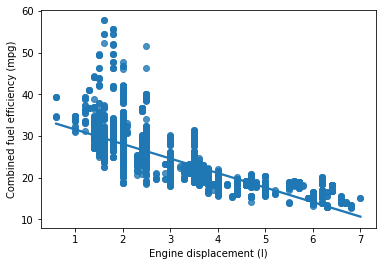

In [7]:
sns.regplot(data=df, x='displ', y='comb')
plt.xlabel('Engine displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)')

##Overplotting, Transparency, and Jitter

##Relationship between fuel efficiency and manufucturing year

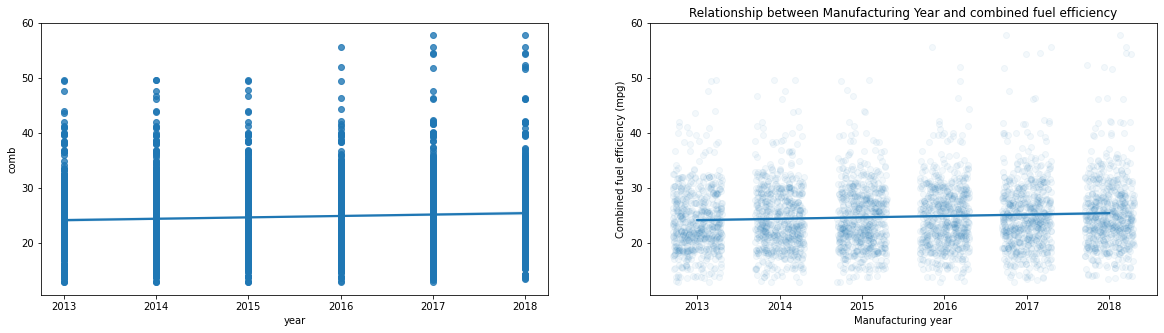

In [30]:
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sns.regplot(data=df, x='year', y='comb')



plt.subplot(1, 2, 2)
sns.regplot(data=df, x='year', y='comb', x_jitter=0.3, scatter_kws={'alpha':1/20} )
plt.xlabel('Manufacturing year')
plt.ylabel('Combined fuel efficiency (mpg)')
plt.title('Relationship between Manufacturing Year and combined fuel efficiency');

The scatter plot on left showing a simple scatter plot, while the right one presents with jitter.

##Heatmap

This is simply a 2-D histogram

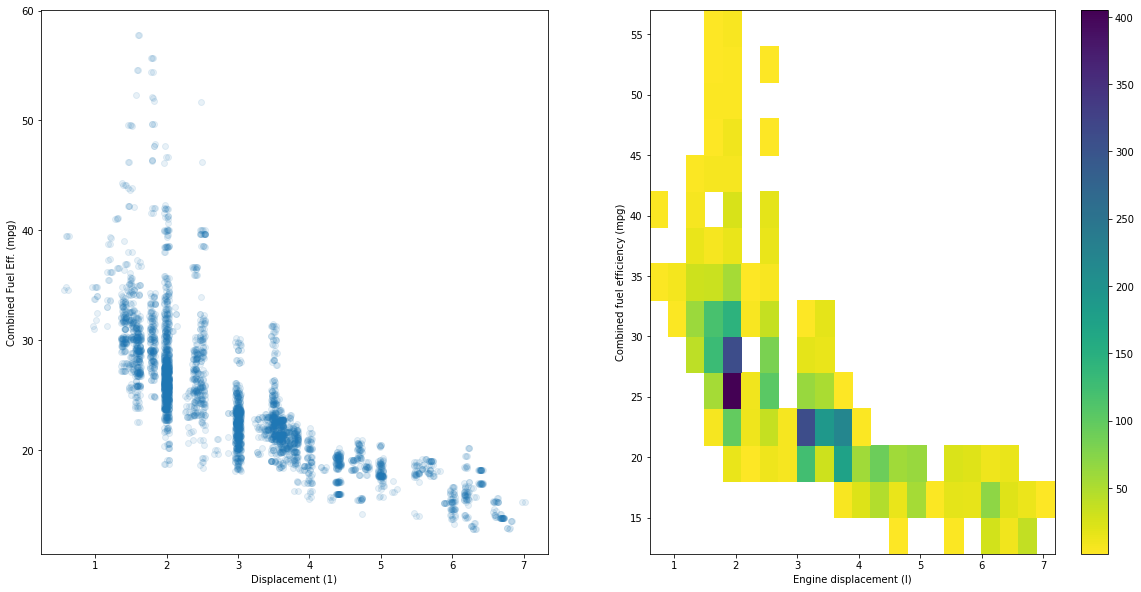

In [39]:

plt.figure(figsize = [20, 10])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sns.regplot(data = df, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

plt.subplot(1, 2, 2)
bins_x=np.arange(0.6, 7+0.3,0.3)
bins_y=np.arange(12, 57+3, 3)
plt.hist2d(data=df, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Engine displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');

# counts = ax[0]

# # Add text annotation on each cell
# # Loop through the cell counts and add text annotations for each
# for i in range(counts.shape[0]):
#     for j in range(counts.shape[1]):
#         c = counts[i,j]
#         if c >= 100: # increase visibility on darker cells
#             plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
#                      ha = 'center', va = 'center', color = 'white')
#         elif c > 0:
#             plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
#                      ha = 'center', va = 'center', color = 'black')

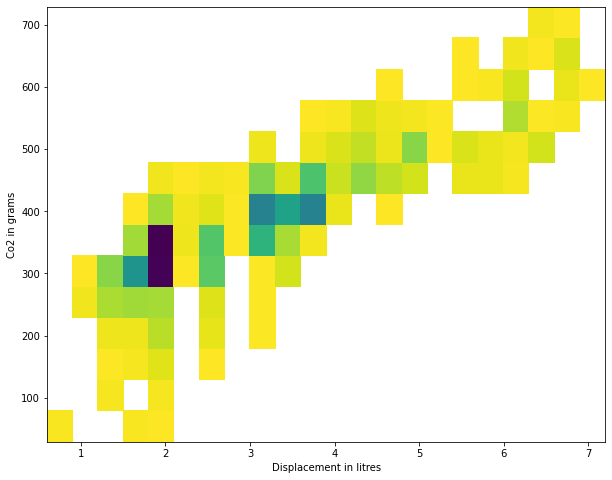

In [42]:
# YOUR CODE HERE
plt.figure(figsize=[10, 8])
bins_x=np.arange(0.6, 7+0.3,0.3)
bins_y=np.arange(29, 692+50, 50)
plt.hist2d(data=df, x='displ', y='co2', cmin=0.5, bins=[bins_x, bins_y], cmap='viridis_r')
plt.xlabel('Displacement in litres')
plt.ylabel('Co2 in grams');



The visualization shows that most cars fall in a line where larger engine sizes correlate with higher emissions. The trend is somewhat broken by those cars with the lowest emissions, which still have engine sizes shared by most cars (between 1 and 3 liters).

##Violin plots

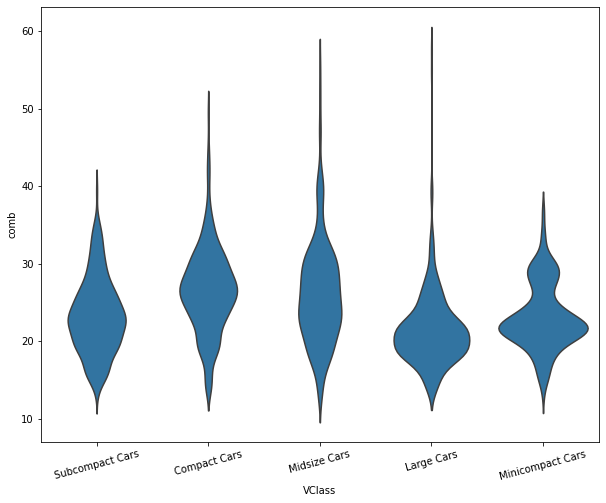

In [44]:
base_color = sns.color_palette()[0]
plt.figure(figsize=[10, 8])
# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sns.violinplot(data=df, x='VClass', y='comb', color=base_color, inner=None)
plt.xticks(rotation=15);